 ## Estacionariedade x Não-estacionariedade

Os dados de uma série são estacionários se os parâmetros de geração não variam em função do tempo. Ou seja: \\
Média de uma série $x_t$ é $E(x_t)=mu(t)$, \\
Variância de uma série $x_t$ é $\sigma^2(t)=E[(x_t - \mu(t))^2]$ \\
Uma série é estacionária na média se $\mu(t)=\mu$, ou seja a média é constante no tempo,

Uma série é estacionária na variância $\sigma^2(t)=\sigma^2$, ou seja, a variância é constante no tempo.

Neste notebook serão criadas a seguir algumas séries com comportamentos distintos ilustrando características do tema.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def gerar_dados_normal(params):
    mu = params[0]
    sigma = params[1]
    return np.random.normal(mu, sigma)

## Série A
Dados com média 0 desvio padrão de 1, gerados em uma distribuição normal

<ipython-input-7-aa1a356b1817>:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  A = pd.Series(index=range(T))


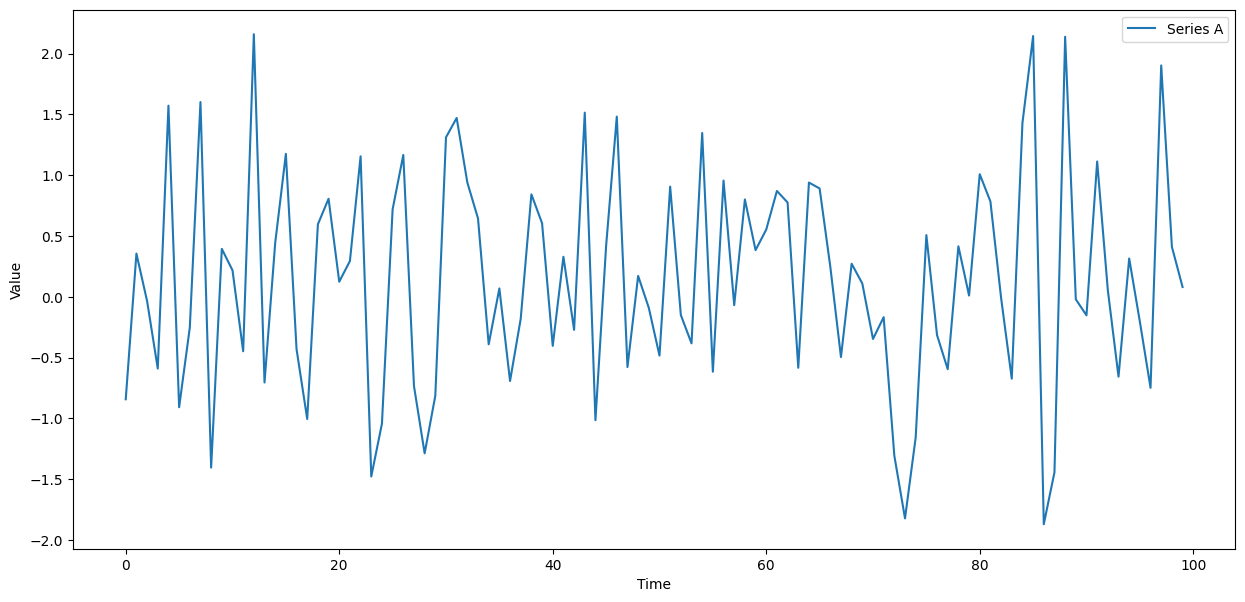

In [7]:
params = (0, 1)
T = 100

A = pd.Series(index=range(T))
A.name = 'A'

for t in range(T):
    A[t] = gerar_dados_normal(params)
plt.figure(figsize=(15,7))
plt.plot(A)
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend(['Série A'])
plt.show()

##Série B
Série com variação dos parâmetros de distribuição ao longo do tempo. Mais especificamente, a média é aumentada a cada intervalo de tempo.

<ipython-input-8-0e46885fccc5>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  B = pd.Series(index=range(T))


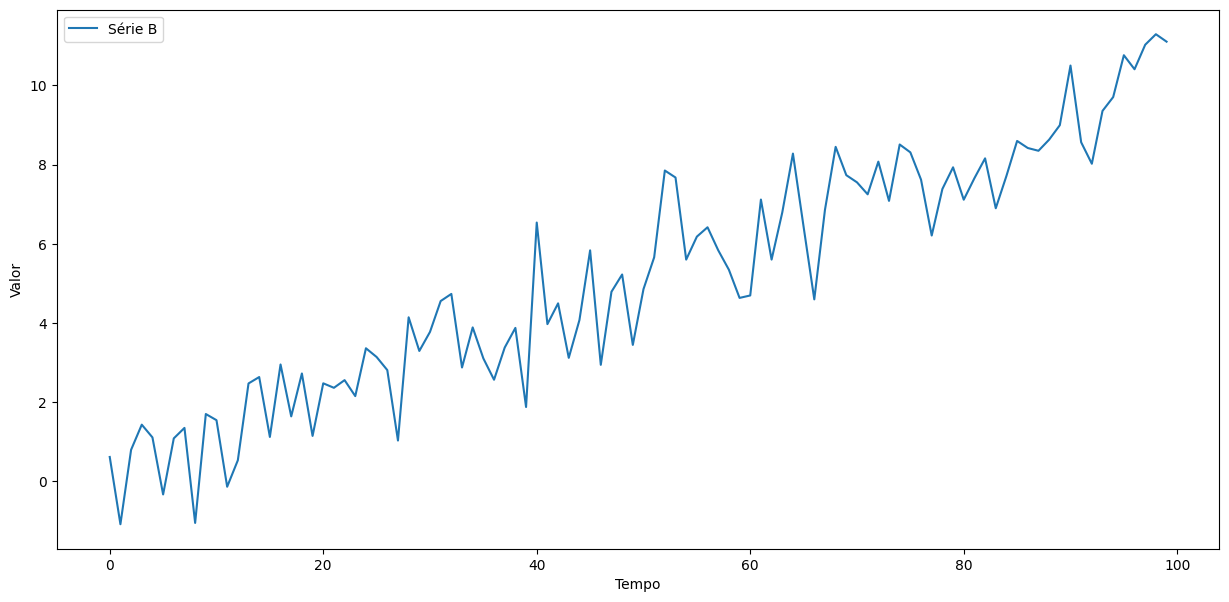

In [8]:
T = 100

B = pd.Series(index=range(T))
B.name = 'B'

for t in range(T):
    params = (t * 0.1, 1)
    B[t] = gerar_dados_normal(params)
plt.figure(figsize=(15,7))
plt.plot(B)
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend(['Série B'])
plt.show()

## Teste de Estacionariedade
Para este exemplo, usaremos o [Teste de Dickey Fuller Aumentado (ADF)](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test).

Ao ser aplicado a um série, retorna um valor-p. Valores muito baixos do valor-p sugerem que a série é estacionária.

In [9]:
from statsmodels.tsa.stattools import adfuller

In [11]:
def teste_estacionariedade(X, cutoff=0.01):
    # O valor de cutoff, aqui definido como 0.01, serve como ponto de corte que, abaixo dele, sugere estacionariedade
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print('valor-p = ' + str(pvalue) + '. A série ' + X.name +' parece ser estacionária.')
        return True
    else:
        print('valor-p = ' + str(pvalue) + '. A série ' + X.name +' parece ser não-estacionária')
        return False

Realizando testes nas séries criadas na seção anterior:

In [41]:
teste_estacionariedade(A)
teste_estacionariedade(B)

valor-p = 2.709022610537579e-16. A série A parece ser estacionária.
valor-p = 0.945390791037224. A série B parece ser não-estacionária


False

Os valores retornados estão de acordo com as séries geradas. A série A possuía parâmetros de distribuição fixos, enquanto a série B apresentava uma média que variava com o tempo.

## A busca pela Estacionariedade

É processo comum na análise e previsão de séries temporais aplicar transformações nos dados, de modo que eles se tornem estacionários, facilitando desse modo eventuais previsões.

No exemplo a seguir, a transformação utilizada é de diferenciação

In [23]:
face_stock = pd.read_csv('facebook-historical-stock-price.csv')
face_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


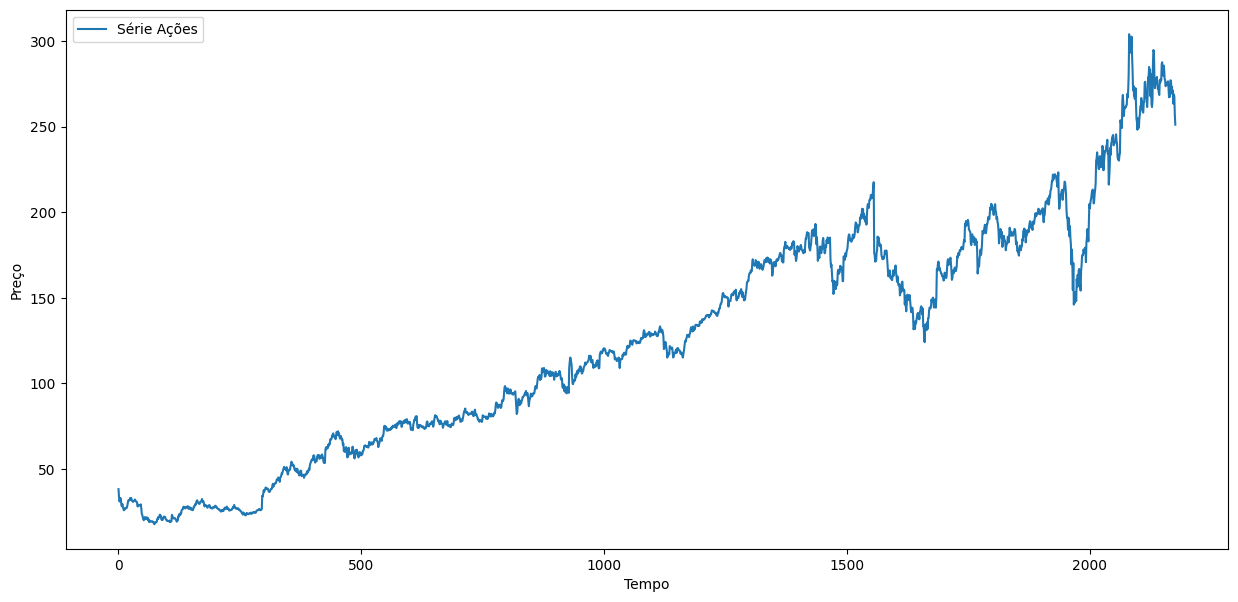

In [24]:
face_stock = pd.Series(face_stock['Close'].values)
face_stock.name = 'Ações Facebook'
plt.figure(figsize=(15,7))
plt.plot(face_stock)
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.legend(['Série Ações'])
plt.show()

In [25]:
teste_estacionariedade(face_stock)

valor-p = 0.9017361242145863. A série Ações Facebook parece ser não-estacionária


False

Aplicando diferenciação à série, temos:

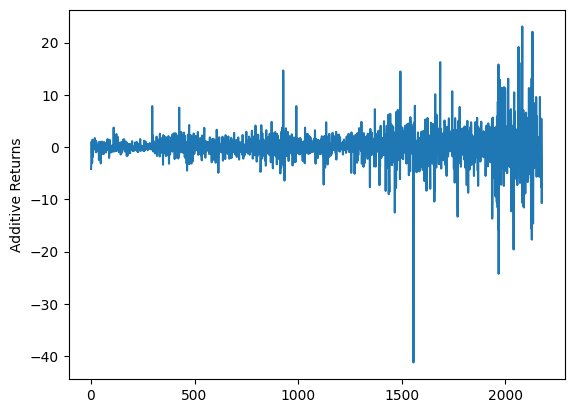

In [30]:
face_stock1 = face_stock.diff()[1:]
face_stock1.name = 'Ações Facebook - Diferenciada'
plt.plot(face_stock1.index, face_stock1.values)
plt.ylabel('Additive Returns')
plt.show()

In [31]:
teste_estacionariedade(face_stock1)


valor-p = 1.2739992205869134e-15. A série Ações Facebook - Diferenciada parece ser estacionária.


True

Trata-se, portanto, de um exemplo em que a diferenciação transformou a série em um conjunto de dados com uma distribuição aparentemente fixa, ou seja, estacionária.